In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Check the dataframe
df_market_data.shape

(41, 7)

In [4]:
# Look for missing data
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [3]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])


In [9]:
# Create a DataFrame with the scaled data
crypto_scaled_df=pd.DataFrame(crypto_scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'])

# Copy the crypto names from the original data
df_market_index=pd.DataFrame(index=df_market_data.index).reset_index()
# Set the coinid column as index
crypto_transformed_df=pd.concat([df_market_index, crypto_scaled_df], axis=1)
crypto_transformed_df.set_index('coin_id', inplace=True)
# Display sample data
crypto_transformed_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [12]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [14]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1, n_init=10)
    k_model.fit(crypto_transformed_df)
    inertia.append(k_model.inertia_)

In [15]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {k[i]: inertia[i] for i in range(len(k))}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow=pd.DataFrame(elbow_data.items(), columns=['k','inertia'])

In [36]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot=df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve'
)
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** k=4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [17]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1, n_init=10)

In [18]:
# Fit the K-Means model using the scaled data
model.fit(crypto_transformed_df)

KMeans(n_clusters=4, n_init=10, random_state=1)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict_4=model.predict(crypto_transformed_df)

# Print the resulting array of cluster values.
predict_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [20]:
# Create a copy of the DataFrame
crypto_transformed_df_prediction=crypto_transformed_df.copy()

In [21]:
# Add a new column to the DataFrame with the predicted clusters
crypto_transformed_df_prediction['k_Cluster']=predict_4

# Display sample data
crypto_transformed_df_prediction.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k_Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [39]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_plot=crypto_transformed_df_prediction.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="k_Cluster",
    title='Scatter Plot by Cryptocurrency Segment - k=4',
    hover_cols='coin_id'
).opts(yformatter="%.0f")
crypto_plot

:NdOverlay   [k_Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [24]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca.fit_transform(crypto_transformed_df)
# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [25]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5% of the variance can be explained by the 3 principal components.

In [26]:
# Create a new DataFrame with the PCA data.
df_crypto_pca = pd.DataFrame(
    crypto_pca,
    columns=["PCA1", "PCA2","PCA3"]
)

# Copy the crypto names from the original data
df_crypto_pca=pd.concat([df_market_index, df_crypto_pca], axis=1)

# Set the coinid column as index
df_crypto_pca.set_index('coin_id', inplace=True)

# Display sample data
df_crypto_pca.head(5)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [27]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))


In [28]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1, n_init=10)
    k_model.fit(df_crypto_pca)
    inertia.append(k_model.inertia_)

In [29]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {k[i]: inertia[i] for i in range(len(k))}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow=pd.DataFrame(elbow_data.items(), columns=['k','inertia'])

In [37]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca=df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve'
)
elbow_plot_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It is the same k value as the one found with the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [31]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1, n_init=10)

In [32]:
# Fit the K-Means model using the PCA data
model.fit(df_crypto_pca)

KMeans(n_clusters=4, n_init=10, random_state=1)

In [33]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predict_4=model.predict(df_crypto_pca)
# Print the resulting array of cluster values.
predict_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [34]:
# Create a copy of the DataFrame with the PCA data
df_crypto_pca_prediction=df_crypto_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_crypto_pca_prediction['k_Cluster_PCA']=predict_4

# Display sample data
df_crypto_pca_prediction.head()

,PCA1,PCA2,PCA3,k_Cluster_PCA
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [40]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_plot_pca=df_crypto_pca_prediction.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="k_Cluster_PCA",
    title='Scatter Plot by Stock Segment - PCA=3',
    hover_cols='coin_id'
).opts(yformatter="%.0f")
crypto_plot_pca


:NdOverlay   [k_Cluster_PCA]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [60]:
# Composite plot to contrast the Elbow curves
elbow_plot_pca.opts(line_dash='dotted')
plot_elbow_comp = elbow_plot * elbow_plot_pca
plot_elbow_comp.opts(title='Elbow Curve Comparison: Blue line= Scaled; Red Dashes= Scaled+PCA')


:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [66]:
import matplotlib.pyplot as plt

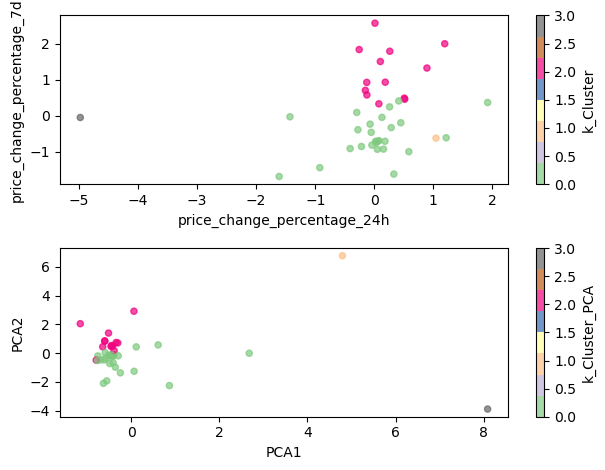

In [104]:
# Composite plot to contrast the clusters
fig, axes = plt.subplots(2)

crypto_transformed_df_prediction.plot(kind='scatter',x='price_change_percentage_24h',y='price_change_percentage_7d',ax=axes[0], c='k_Cluster',cmap='Accent',alpha=0.7)
df_crypto_pca_prediction.plot(kind='scatter',x='PCA1',y='PCA2',legend='k_Cluster_PCA',ax=axes[1], c='k_Cluster_PCA', cmap='Accent',alpha=0.7)

plt.tight_layout()


In [107]:
# Side-by-side comparison of the clusterizations obtained by the two methods for each of the crypto currencies (spoiler alert: they are identical)
compare_df=pd.concat([crypto_transformed_df_prediction['k_Cluster'],df_crypto_pca_prediction['k_Cluster_PCA']], axis=1)
compare_df

,k_Cluster,k_Cluster_PCA
coin_id,,
bitcoin,2,2
ethereum,2,2
tether,0,0
ripple,0,0
bitcoin-cash,2,2
binancecoin,2,2
chainlink,2,2
cardano,2,2
litecoin,2,2


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Going from seven to three features has no impact on the elbow cuve, which remains identical.<br><br>
  With 89.5% of the variance explained with three features, the four clusters obtained with the PCA prediction are well defined and exactly match the clusterization obtained previously. One may even advance that the cluster #1 is better defined when using the PCA axes.